<a href="https://www.kaggle.com/pedrotavaressilva/my-first-ever-kaggle-competition?scriptVersionId=88887566" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Default imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
# Custom imports
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# determine file paths
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Load data

We will split the data in three dataframes:
- Train (80% of data from 'train.csv')
- Test (20% of data from 'train.csv')
- Validate (data from 'test.csv)

We will call 'df' to the data from 'train.csv', which we will latter split into 'train' and 'test'.

In [4]:
# Load data
df = pd.read_csv("/kaggle/input/titanic/train.csv")
validate = pd.read_csv("/kaggle/input/titanic/test.csv")
submission = pd.read_csv("/kaggle/input/titanic/gender_submission.csv")

# Exploratory Data Analysis (EDA)

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print('Train shape: {}\nTest shape:{}'.format(df.shape, validate.shape))

Train shape: (891, 12)
Test shape:(418, 11)


In [7]:
# Create dataframe with all data /train + validate), 
# so we can use data available to impute missing values

df_complete = pd.concat([df.copy(), validate.copy()], axis = 0)
df_complete.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [8]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [9]:
df_complete.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
df_complete.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [11]:
# we have duplicated passenger IDs (that's ok)
df_complete.index.is_unique

False

In [12]:
# We have two passengers that are in both train and test
# This is weird, as we allready know their target value
df_complete.Name.value_counts()

Connolly, Miss. Kate                                   2
Kelly, Mr. James                                       2
Braund, Mr. Owen Harris                                1
Johnson, Master. Harold Theodor                        1
Gustafsson, Mr. Alfred Ossian                          1
                                                      ..
Carter, Miss. Lucile Polk                              1
Silvey, Mr. William Baird                              1
Kallio, Mr. Nikolai Erland                             1
Louch, Mrs. Charles Alexander (Alice Adelaide Slow)    1
Peter, Master. Michael J                               1
Name: Name, Length: 1307, dtype: int64

In [13]:
validate.loc[validate.Name =='Connolly, Miss. Kate']

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


In [14]:
df.loc[df.Name =='Connolly, Miss. Kate']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.75,NaN,Q


This if weird. The same passenger name in present in both 'train' and 'test', but age, ticket number and fare are different

In [15]:
# let's reset the index
df_complete.index = list(range(0,len(df_complete)))

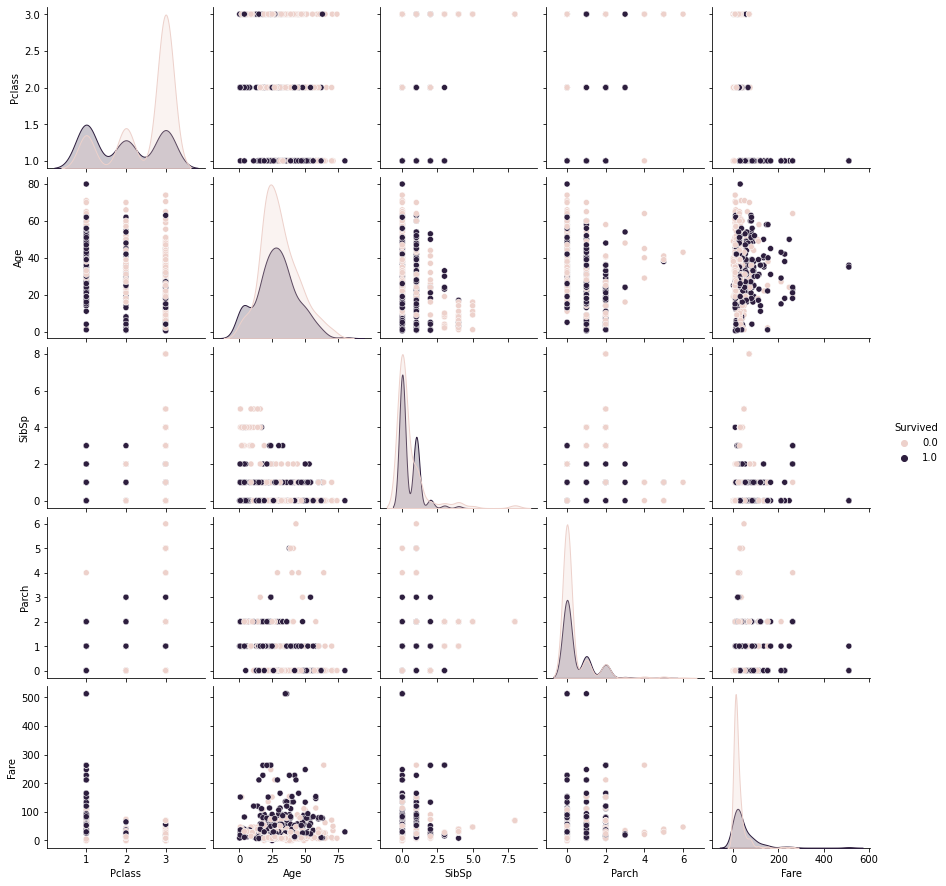

In [16]:
import seaborn as sns
sns.pairplot(df_complete.drop('PassengerId', axis=1), diag_kind='kde', hue='Survived')

In [17]:
# list numeric columns
numerical_cols = list(df_complete.select_dtypes('number'))
numerical_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [18]:
# list categorical columns
categorical_cols = list(set(df_complete.columns) - set(numerical_cols))
categorical_cols

['Sex', 'Name', 'Cabin', 'Embarked', 'Ticket']

### Cabin
According to this blog post https://triangleinequality.wordpress.com/2013/09/08/basic-feature-engineering-with-the-titanic-data/
only first class passengers have cabin numbers, and they are composed of a deck letter and a cabin door number.
Later I'll extract the deck and add it as a categorical feature. Second and thir class 

### Embarked

This is a simple categorical feature, with the port where the passenger embarked (three different values). Maybe lower class rooms where assigned based on the order of boarding (furthest from the deck first). If this was the case, people that boarded first had their rooms farthest from the deck. 

In [19]:
df_complete.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

Let's look at the missing values, to determine how to impute them.

In [20]:
df_complete[df_complete.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Thei're first class passengers, as they have cabin numbers. Let's see where most first class passengers boarded.

In [21]:
df_complete.Embarked[df_complete.Cabin.notnull()].value_counts()

S    170
C    118
Q      5
Name: Embarked, dtype: int64

### Name

To keep it simple I'll just ignore this feature (but we could extract the title, family names, etc.)

### Ticket

There seems to be some information there, but I'll ignore it at this time, to keep it simple.

In [22]:
df_complete.Ticket.value_counts()

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64

# EDA conclusions

There are null missing values in 
- Age (263 values) - I'll impute the mode for the gender
- Fare (1 value) - I'll impute the mean for the gender
- Cabin (1014) - I'll impute based on the Pclass and then drop Pclass
- Embarked (2) - I'll impute 'S', as it is the most common port for first class passengers

Categoricl features:
- Cabin - I'll extract the deck letter and assign a deck letter for second and third class passengers (this category will have 10 distinct values)
- Embarked (3 values)
- Sex (2 values) 

For training I'll drop:
- Passengerid
- Name
- Ticket

# Data preparation

1. Drop unused features
2. Impute numerical features
3. Normalize numerical features
3. Impute categorical features
4. Create dummies
5. Reduce dimentions (PCA)

In [23]:
# Drop unused features
df = df.drop(columns = ['Name', 'Ticket'], axis=1)
validate = validate.drop(columns = ['Name', 'Ticket'], axis=1)

### Impute numeric features

In [24]:
# Age (263 values) - I'll impute the mode for the gender
male_age_mode = df_complete[df_complete.Sex == 'male'].Age.mode()[0]
female_age_mode = df_complete[df_complete.Sex == 'female'].Age.mode()[0]

print('Male age mode: {}\nFemale age mode:{}'.format(male_age_mode, female_age_mode))

Male age mode: 21.0
Female age mode:22.0


In [25]:
df.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [26]:
mask_male = ((df.Sex == 'male') & df.Age.isna())
df.loc[mask_male, 'Age'] = male_age_mode

mask_male = ((validate.Sex == 'male') & validate.Age.isna())
validate.loc[mask_male, 'Age'] = male_age_mode

mask_female = ((df.Sex == 'female') & df.Age.isna())
df.loc[mask_female, 'Age'] = female_age_mode

mask_female = ((validate.Sex == 'female') & validate.Age.isna())
validate.loc[mask_female, 'Age'] = female_age_mode

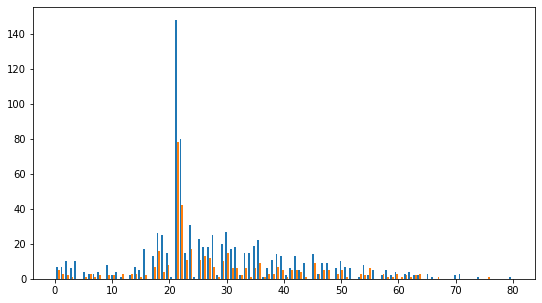

In [27]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.hist(x=[df.Age,validate.Age],bins=100)
plt.show()

In [28]:
# The missing fare is in validation
validate.Fare.isna().sum()

1

In [29]:
# Fare (1 value) - I'll impute the median for the gender
validate.loc[validate.Fare.isna()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
152,1044,3,male,60.5,0,0,NaN,NaN,S


The missing fare is of a male passenger.

In [30]:
male_fare_mean = df_complete.loc[df_complete.Sex == 'male', 'Fare'].mean()
validate.loc[validate.Fare.isna(), 'Fare'] = male_fare_mean

# Normalize numerical features

We'll use Scikit-Learn's StandardScaler to replace features with their z score

$z = \frac{x - u}{s}$

In [31]:
# find numerical columns
numerical_cols = list(df.select_dtypes('number'))
numerical_cols

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

'PassengerId' is required for the submission, so I'll leave it alone.

'Survived' is the taget, so I'll leave it alone too.

'SibSp' is the number of Siblings/Spouses Aboard and 'Parch' is the number of Parents/Children Aboard.

Only 'Age', 'Fare' and 'SibSp' will need to be normalized.

In [32]:
df = df.drop('Parch', axis=1)
validate = validate.drop('Parch', axis=1)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(df_complete.loc[:,['Age','Fare','SibSp']])
df.loc[:,['Age','Fare', 'SibSp']] = scaler.transform(df.loc[:,['Age','Fare', 'SibSp']])
validate.loc[:,['Age','Fare', 'SibSp']] = scaler.transform(validate.loc[:,['Age','Fare', 'SibSp']])

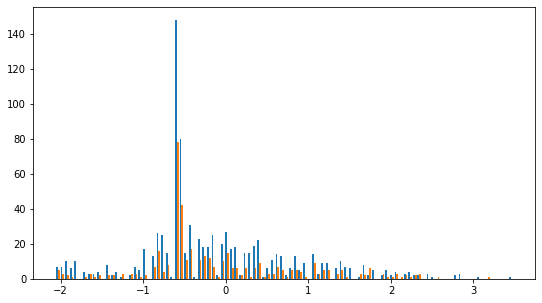

In [34]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.hist(x=[df.Age,validate.Age],bins=100)
plt.show()

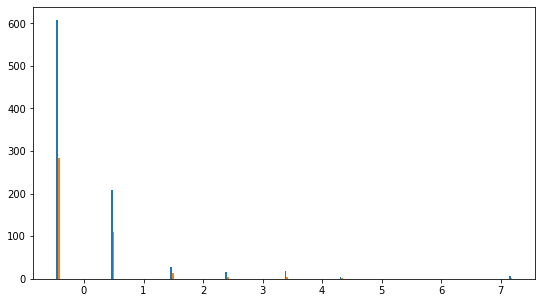

In [35]:
fig, ax = plt.subplots(figsize=(9, 5))
ax.hist(x=[df.SibSp,validate.SibSp],bins=100)
plt.show()

# Impute categorical features

Cabin - extract the deck letter and assign a deck letter for each class when missing
Embarked - use most common port of embarking for the class.
Sex (2 values)

In [36]:
# Cabin - I'll impute based on the Pclass and then drop Pclass

def get_deck(cabin):
    if cabin is np.nan:
        return np.nan
    for substring in ['A', 'B', 'C', 'D', 'E', 'F', 'T', 'G']:
        if cabin.find(substring) != -1:
            return substring
    return np.nan

In [37]:
df['Cabin'] = df['Cabin'].map(lambda x: get_deck(x))
validate['Cabin'] = validate['Cabin'].map(lambda x: get_deck(x))

In [38]:
df.Cabin.unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [39]:
validate.Cabin.unique()

array([nan, 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [40]:
# Impute third class
mask = (df.Cabin.isna() & (df.Pclass == 3))
df.loc[mask,'Cabin'] = 'Z'
print('Imputed {} third class cabins in df'.format(mask.sum()))
    
mask = (validate.Cabin.isna() & (validate.Pclass == 3))
validate.loc[mask,'Cabin'] = 'Z'
print('Imputed {} third class cabins in validate'.format(mask.sum()))

Imputed 479 third class cabins in df
Imputed 214 third class cabins in validate


In [41]:
# Impute second class
mask = (df.Cabin.isna() & (df.Pclass == 2))
df.loc[mask,'Cabin'] = 'W'
print('Imputed {} second class cabins in df'.format(mask.sum()))

mask = (validate.Cabin.isna() & (validate.Pclass == 2))
validate.loc[mask,'Cabin'] = 'W'
print('Imputed {} second class cabins in validate'.format(mask.sum()))

Imputed 168 second class cabins in df
Imputed 86 second class cabins in validate


In [42]:
# Impute first class
mask = (df.Cabin.isna() & (df.Pclass == 1))
df.loc[mask,'Cabin'] = 'W'
print('Imputed {} first class cabins in df'.format(mask.sum()))

mask = (validate.Cabin.isna() & (validate.Pclass == 1))
validate.loc[mask,'Cabin'] = 'W'
print('Imputed {} first class cabins in validate'.format(mask.sum()))

Imputed 40 first class cabins in df
Imputed 27 first class cabins in validate


In [43]:
df['Cabin'].unique()

array(['Z', 'C', 'E', 'W', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [44]:
validate['Cabin'].unique()

array(['Z', 'W', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

There are no more NaN in 'Cabin'

In [45]:
# Determine missing 'Embarked' passengers
mask = df.Embarked.isna()
df[mask]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked
61,62,1,1,female,0.563552,-0.479087,0.902697,B,NaN
829,830,1,1,female,2.229454,-0.479087,0.902697,B,NaN


In [46]:
mask = validate.Embarked.isna()
validate[mask]

,PassengerId,Pclass,Sex,Age,SibSp,Fare,Cabin,Embarked


Both are first class in df.

Let's determine the most common port of embarking for first class passengers.

In [47]:
df_complete.loc[df_complete.Pclass == 1, 'Embarked'].value_counts()

S    177
C    141
Q      3
Name: Embarked, dtype: int64

The more popular port has a value of 'S'. That's what we'll impute for the two missing values.

In [48]:
mask = df.Embarked.isna()
df.loc[mask,'Embarked'] = 'S'

In [49]:
# Now Pcalss is encoed in Deck, so I'll drop it
df = df.drop(columns = 'Pclass')
validate = validate.drop(columns = 'Pclass')

### Create dummies
We'll encode 'Sex', 'Cabin' and 'Embarked'

In [50]:
df[['Sex', 'Cabin', 'Embarked']].isna().sum()

Sex         0
Cabin       0
Embarked    0
dtype: int64

In [51]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(drop='first',sparse=False)
df_clean = pd.concat([df, validate], axis='rows')
encoder.fit(df_clean[['Sex', 'Cabin', 'Embarked']])

OneHotEncoder(drop='first', sparse=False)

In [52]:
encoder.categories_

[array(['female', 'male'], dtype=object),
 array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T', 'W', 'Z'], dtype=object),
 array(['C', 'Q', 'S'], dtype=object)]

In [53]:
df_encoded = pd.DataFrame(encoder.transform(df[['Sex', 'Cabin', 'Embarked']]))
validate_encoded = pd.DataFrame(encoder.transform(validate[['Sex', 'Cabin', 'Embarked']]))

In [54]:
df = pd.concat([df, df_encoded], axis='columns')
validate = pd.concat([validate, validate_encoded], axis='columns')

In [55]:
df = df.drop(columns=['Sex', 'Cabin', 'Embarked'])
validate = validate.drop(columns=['Sex', 'Cabin', 'Embarked'])

In [56]:
df.columns

Index(['PassengerId',    'Survived',         'Age',       'SibSp',
              'Fare',             0,             1,             2,
                   3,             4,             5,             6,
                   7,             8,             9,            10,
                  11],
      dtype='object')

### Principal Component Analysis

In [57]:
validate.columns

Index(['PassengerId', 'Age', 'SibSp', 'Fare', 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
       11],
      dtype='object')

In [58]:
# PCA

### X and y

In [59]:
X_df = df.copy()
y_df = X_df.pop("Survived")

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=123)

In [61]:
print('X train: {}\nX test: {}'.format(X_train.shape, X_test.shape))

X train: (712, 16)
X test: (179, 16)


# Train

6. Logistic Regression
7. k-NN
8. Random Forest
9. Evaluate and choose

In [62]:
# decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score

max_depth = range(2,10)
min_samples_split = range(2,10)
min_samples_leaf = range(1,5)

In [63]:
X_train.head(2)

,PassengerId,Age,SibSp,Fare,0,1,2,3,4,5,6,7,8,9,10,11
329,330,-0.963526,-0.479087,0.477083,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
749,750,0.077663,-0.479087,-0.493739,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [64]:
y_train.head(2)

329    1
749    0
Name: Survived, dtype: int64

In [65]:
results = pd.DataFrame( data = [], columns = ['params',
                                              'Train_accuracy',
                                              'Test_accuracy',
                                              'Rating'])
for i in max_depth:
    for j in min_samples_split:
        for k in min_samples_leaf:           
            model = tree.DecisionTreeClassifier(max_depth=i,
                                                min_samples_split=j,
                                                min_samples_leaf=k)
            model.fit(X=X_train.drop('PassengerId', axis=1), y=y_train)
            ac_test = accuracy_score(y_test, model.predict(X_test.drop('PassengerId', axis=1)))
            ac_train = accuracy_score(y_train, model.predict(X_train.drop('PassengerId', axis=1)))
            results = results.append(
                pd.DataFrame(
                    [['max_depth: {} / min_samples_split: {} / min_samples_leaf: {}'.format(i, j, k),
                    ac_train,
                    ac_test,
                    ac_test - abs(ac_train-ac_test)/2]], 
                    columns = ['params', 'Train_accuracy', 'Test_accuracy', 'Rating']), ignore_index = True)

Let's see the best accuracy for the training, test and the best rating.

In [66]:
print('Best train accy: {}\nBest test accy: {}\nBest rating: {}'.format(
    results.Train_accuracy.max(),
    results.Test_accuracy.max(),
    results.Rating.max()))

Best train accy: 0.9213483146067416
Best test accy: 0.8491620111731844
Best rating: 0.8426103195028561


## Model with the best rating

In [67]:
# Best model parameters
results.loc[results.Rating.idxmax(),'params']

'max_depth: 5 / min_samples_split: 3 / min_samples_leaf: 4'

In [68]:
# Best model results
results.loc[results.Rating.idxmax()]

params            max_depth: 5 / min_samples_split: 3 / min_samp...
Train_accuracy                                             0.845506
Test_accuracy                                              0.843575
Rating                                                      0.84261
Name: 103, dtype: object

# Generate submission

In [69]:
model = tree.DecisionTreeClassifier(max_depth=5,
                                    min_samples_split=2,
                                    min_samples_leaf=4)
model.fit(X=X_df.drop('PassengerId', axis=1), y=y_df) # retrain with all training data
accuracy_score(y_df, model.predict(X_df.drop('PassengerId', axis=1)))

0.8395061728395061

In [70]:
predictions = model.predict(validate.drop('PassengerId', axis=1))
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [71]:
submission_final = pd.concat([validate.PassengerId, 
                              pd.DataFrame(predictions, columns=['Survived'])], 
                             axis='columns', ignore_index = True)

In [72]:
submission_final

,0,1
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [73]:
# look at the example submission, to see if the format is correct
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [74]:
df.columns

Index(['PassengerId',    'Survived',         'Age',       'SibSp',
              'Fare',             0,             1,             2,
                   3,             4,             5,             6,
                   7,             8,             9,            10,
                  11],
      dtype='object')

In [75]:
# Should we impute the know target to the two passengers that are duplicated?
# Connolly, Miss. Kate

df_complete.loc[df_complete.Name == 'Connolly, Miss. Kate']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
289,290,1.0,3,"Connolly, Miss. Kate",female,22.0,0,0,370373,7.7500,NaN,Q
897,898,NaN,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


The Age is change by quite a bit, and there are smaller changes to Fare. I don't think we shoud use the Survived for the passenger with the same name.

In [76]:
df_complete.loc[df_complete.Name == 'Kelly, Mr. James']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
696,697,0.0,3,"Kelly, Mr. James",male,44.0,0,0,363592,8.0500,NaN,S
891,892,NaN,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [77]:
submission_final.columns=['PassengerId','Survived']

In [78]:
submission_final = submission_final.set_index('PassengerId')

In [79]:
submission_final

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [80]:
submission_final.to_csv("submission.csv")

In [81]:
for dirname, _, filenames in os.walk('/kaggle'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/src/script.ipynb
/kaggle/lib/kaggle/gcp.py
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/working/submission.csv
/kaggle/working/__notebook__.ipynb


The same applies to this passenger, wich also has a different port of embarcation.